## Stock Market


> ### 📘 Stock Market Column Descriptions  
>  
> | Column       | Description |
> |--------------|-------------|
> | **Open**     | The opening price of the asset in a given time frame. This is shown at the top or bottom of the candle body, depending on whether the price moved higher or lower during that period. |
> | **High**     | The maximum price reached during the time period. Represented by the upper shadow (wick) or upper tail of the candle. |
> | **Low**      | The minimum price in the time frame. Shown by the lower shadow or tail beneath the candle body. |
> | **Close**    | The last traded price when the time frame ends. Marks the completion of a candle and the start of a new one. |
> | **Adj Close**| Adjusted closing price, which reflects the true closing value after accounting for splits, dividends, and corporate actions. |
> | **Date**     | Timestamp of each entry in the dataset. |



In [ ]:
#1. Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#  Load the dataset
df = pd.read_csv('Market.csv')

In [9]:
df.head()

,Index,Date,Open,High,Low,Close,Adj Close,Volume
0,NYA,1/1/1965,528.690002,528.690002,528.690002,528.690002,528.690002,0.0
1,NYA,1/3/1966,527.210022,527.210022,527.210022,527.210022,527.210022,0.0
2,NYA,1/4/1966,527.840027,527.840027,527.840027,527.840027,527.840027,0.0
3,NYA,1/5/1966,531.119995,531.119995,531.119995,531.119995,531.119995,0.0
4,NYA,1/6/1966,532.070007,532.070007,532.070007,532.070007,532.070007,0.0


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,110253.000000,110252.000000,110251.000000,110250.000000,110244.000000,1.102530e+05
mean,7658.561932,7704.538416,7608.129749,7657.740822,7657.982529,1.273975e+09
std,9011.455529,9066.605458,8954.536718,9011.555549,9011.723572,4.315783e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,1855.060059,1864.687470,1844.015015,1855.347473,1855.057556,0.000000e+00
50%,5194.399902,5226.750000,5154.299805,5194.889892,5195.699951,4.329000e+05
75%,10134.299810,10207.827635,10060.369630,10134.867430,10135.512452,1.734314e+08
max,68775.062500,69403.750000,68516.992190,68775.062500,68775.062500,9.440374e+10


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112457 entries, 0 to 112456
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      112457 non-null  object 
 1   Date       112457 non-null  object 
 2   Open       110253 non-null  float64
 3   High       110252 non-null  float64
 4   Low        110251 non-null  float64
 5   Close      110250 non-null  float64
 6   Adj Close  110244 non-null  float64
 7   Volume     110253 non-null  float64
dtypes: float64(6), object(2)
memory usage: 6.9+ MB


In [13]:
df.shape

(112457, 8)

In [ ]:
#  Handle Missing Values
print("Missing values before handling:\n", df.isnull().sum())

Missing values before handling:
 Index           0
Date            0
Open         2204
High         2205
Low          2206
Close        2207
Adj Close    2213
Volume       2204
dtype: int64


In [17]:
df.ffill(inplace=True)


In [18]:
print("Missing values after handling:\n", df.isnull().sum())

Missing values after handling:
 Index        0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [19]:
# 5. Remove duplicate rows
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


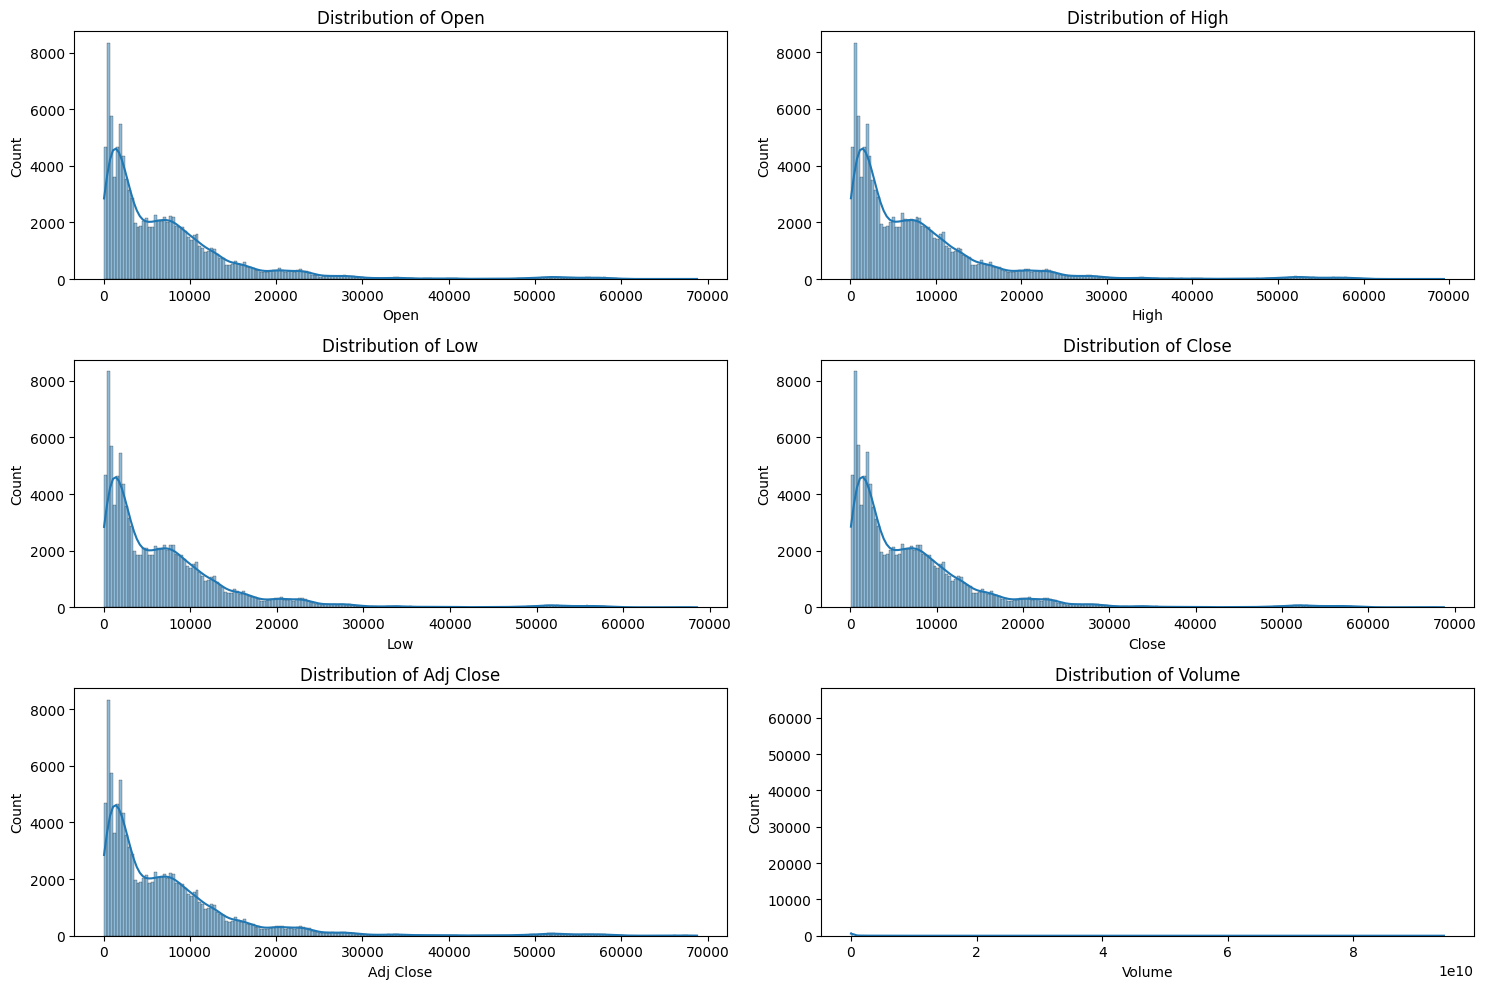

In [20]:
# 6. Distribution of data
num_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

Helps understand how stock prices and volume are distributed over time.

Identifies skewness (asymmetric distribution) or normality.

Detects volatility in stock prices.

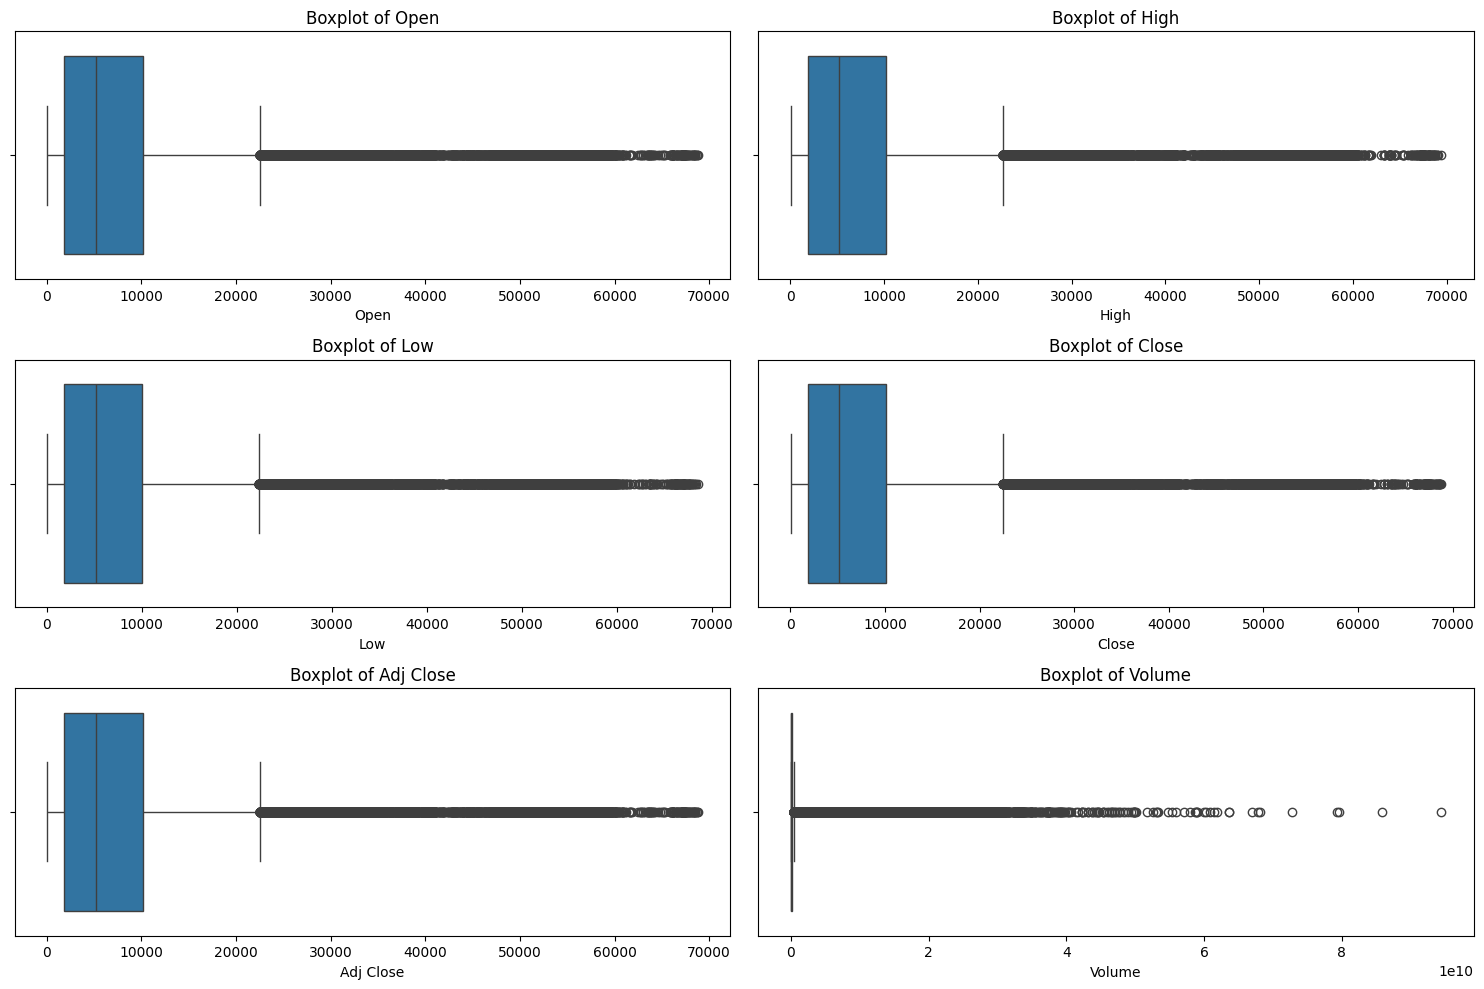

In [21]:
# 7. Identify and handle outliers with boxplot
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

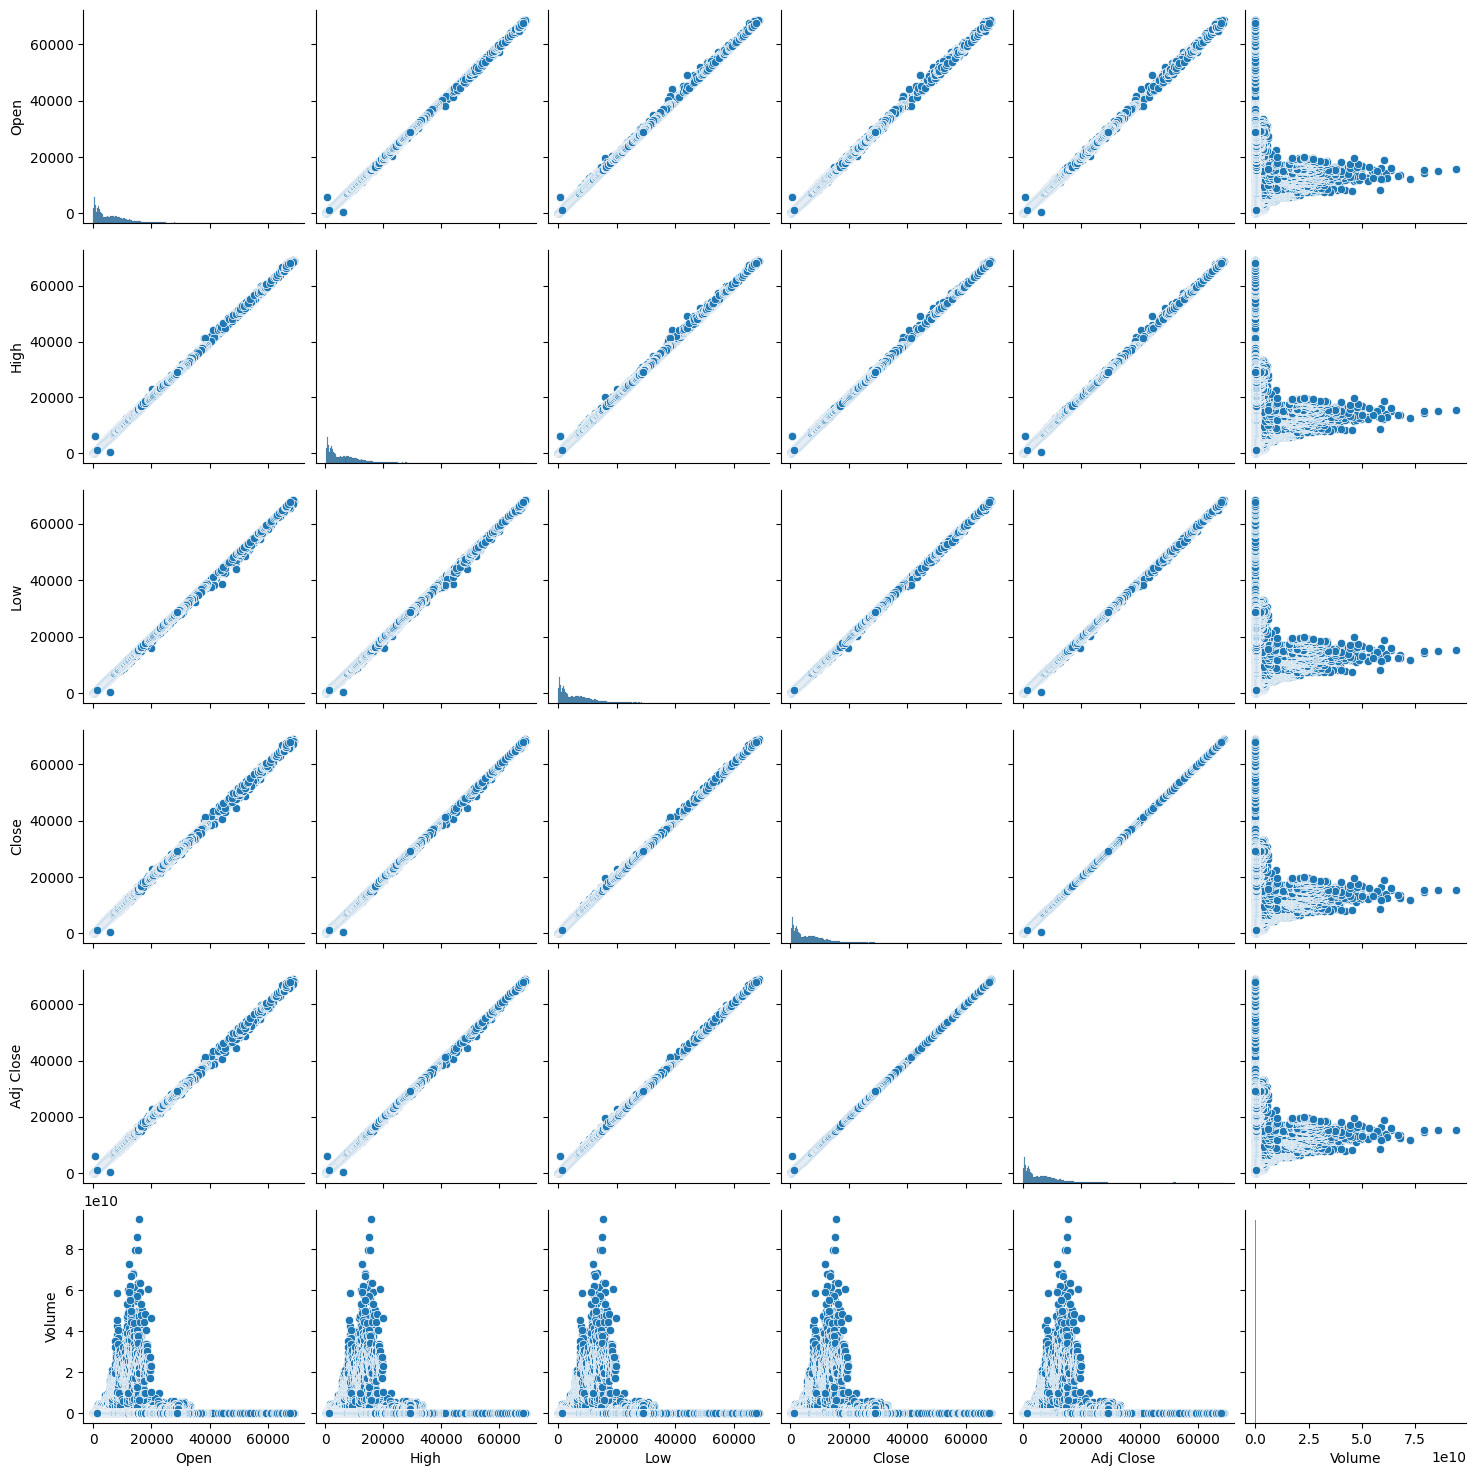

In [22]:
# Correlation Analysis
sns.pairplot(df[num_cols])
plt.show()

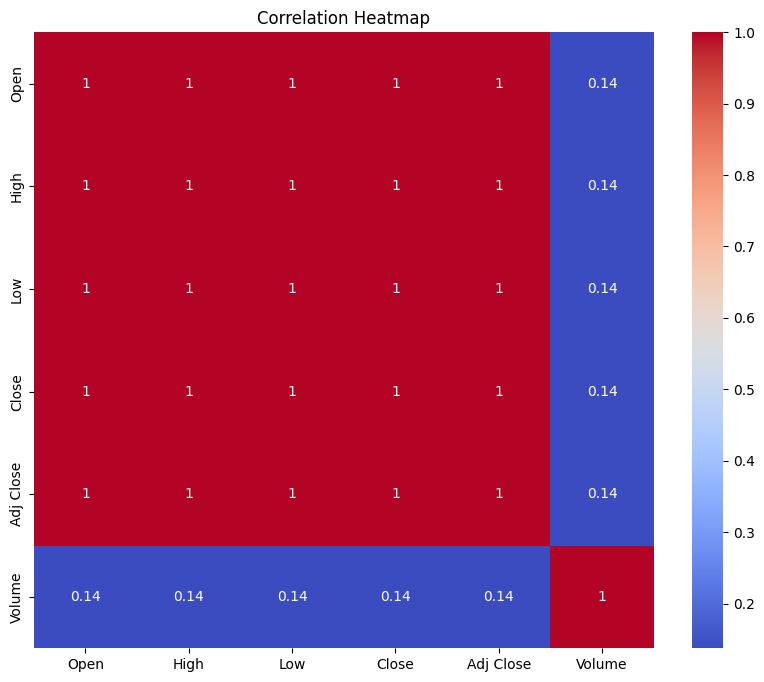

In [23]:
plt.figure(figsize=(10, 8))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#  Encoding Categorical Columns
# 'Index' is categorical
le = LabelEncoder()
df['Index'] = le.fit_transform(df['Index'])

In [25]:
# Normalization
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [26]:
# Separate Feature Variables (X) and Target Variable (y)
X = df.drop(['Adj Close', 'Date'], axis=1)  # Dropping Date and setting 'Adj Close' as target
y = df['Adj Close']

In [27]:
print("Feature variables (X):\n", X.head())
print("Target variable (y):\n", y.head())

Feature variables (X):
    Index      Open      High       Low     Close    Volume
0     11 -0.791706 -0.791975 -0.791104 -0.791610 -0.292893
1     11 -0.791871 -0.792139 -0.791270 -0.791774 -0.292893
2     11 -0.791801 -0.792069 -0.791199 -0.791704 -0.292893
3     11 -0.791436 -0.791707 -0.790833 -0.791340 -0.292893
4     11 -0.791331 -0.791602 -0.790726 -0.791234 -0.292893
Target variable (y):
 0   -0.791587
1   -0.791751
2   -0.791681
3   -0.791317
4   -0.791211
Name: Adj Close, dtype: float64


In [28]:
#  Split into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Apply Model:
## Model 1: Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [30]:
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

In [31]:
print("\nLinear Regression Performance:")
print("MSE:", mse_lr)
print("R2 Score:", r2_lr)


Linear Regression Performance:
MSE: 1.6578639847684114e-08
R2 Score: 0.9999999830928458


In [32]:
## Model 2: Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [33]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [34]:
print("\nRandom Forest Regressor Performance:")
print("MSE:", mse_rf)
print("R2 Score:", r2_rf)


Random Forest Regressor Performance:
MSE: 5.641637621463726e-07
R2 Score: 0.9999994246570396


In [35]:
# Compare the Models
comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest Regressor'],
    'MSE': [mse_lr, mse_rf],
    'R2 Score': [r2_lr, r2_rf]
})

In [36]:
print("\nModel Comparison:\n", comparison)


Model Comparison:
                      Model           MSE  R2 Score
0        Linear Regression  1.657864e-08  1.000000
1  Random Forest Regressor  5.641638e-07  0.999999
